<a href="https://colab.research.google.com/github/kunal-git-002/pose-estimation/blob/master/pt1_Detectron_2_keypoints_detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Git hub link for detectron 2

>https://github.com/facebookresearch/detectron2



about detectron 2

> detectron official :[https://detectron2.readthedocs.io/](https://detectron2.readthedocs.io/)



>[https://ai.facebook.com/blog/-detectron2-a-pytorch-based-modular-object-detection-library-/](https://ai.facebook.com/blog/-detectron2-a-pytorch-based-modular-object-detection-library-/)

> [https://research.fb.com/downloads/detectron/](https://research.fb.com/downloads/detectron/)





***more abt keypoints:***

> [https://detectron2.readthedocs.io/_modules/detectron2/structures/keypoints.html](https://detectron2.readthedocs.io/_modules/detectron2/structures/keypoints.html)



In [1]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [12]:
im = cv2.imread("/content/drive/My Drive/pose detection/caffe_models/imgs/pose5.jpg")


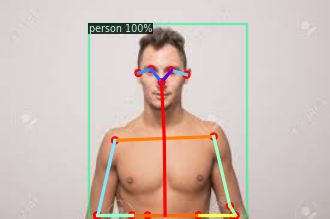

In [13]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

outputs = predictor(im)#return a dictionaries

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
outputs

***keypoints outputs description***:[https://detectron2.readthedocs.io/tutorials/models.html#model-output-format](https://detectron2.readthedocs.io/tutorials/models.html#model-output-format)

> “instances”: Instances object with the following fields:



> “pred_boxes”: Boxes object storing N boxes, one for each detected instance.



> “scores”: Tensor, a vector of N scores.



>“pred_classes”: Tensor, a vector of N labels in range [0, num_categories).


> “pred_masks”: a Tensor of shape (N, H, W), masks for each detected instance.

> “pred_keypoints”: a Tensor of shape (N, num_keypoint, 3). Each row in the last dimension is (x, y, score). Scores are larger than 0.















extra work custom dataset

> [https://detectron2.readthedocs.io/tutorials/datasets.html](https://detectron2.readthedocs.io/tutorials/datasets.html)



# getting the points data

In [ ]:
ar=np.array([[6.1485e+02, 1.6885e+02, 1.1249e+00],
          [6.3580e+02, 1.5086e+02, 1.6569e+00],
          [5.9538e+02, 1.5086e+02, 1.6675e+00],
          [6.6574e+02, 1.5686e+02, 1.5048e+00],
          [5.6844e+02, 1.5836e+02, 1.6483e+00],
          [7.1814e+02, 3.0083e+02, 3.8008e-01],
          [5.1305e+02, 3.0083e+02, 3.8692e-01],
          [7.4209e+02, 4.6581e+02, 6.9941e-01],
          [4.8610e+02, 4.7181e+02, 1.0439e+00],
          [7.8251e+02, 6.1129e+02, 1.0352e+00],
          [4.3819e+02, 6.1428e+02, 8.1868e-01],
          [6.7922e+02, 6.1878e+02, 1.6900e-01],
          [5.4598e+02, 6.1578e+02, 2.0307e-01],
          [6.5826e+02, 8.6475e+02, 4.8749e-01],
          [5.6844e+02, 8.6625e+02, 5.5913e-01],
          [6.4628e+02, 1.0882e+03, 4.4645e-01],
          [5.8640e+02, 1.0882e+03, 4.7909e-01]])
for i in ar:
  print(i[2])

In [ ]:
for i in range(len(ar)):
  x,y,t=ar[i]
  cv2.circle(im,
             (int(x),int(y)),
             5,
             (0,0,255),
             -1)
  
  cv2.putText(im,
              str(i),
              (int(x),int(y)),
              cv2.FONT_HERSHEY_PLAIN,
              2,
              (0,255,255),
              2)
  if i==len(ar)-1:
    cv2_imshow(im)




In [ ]:
human_keypoints={0: 'nose',
 1: 'left_eye',
 2: 'right_eye',
 3: 'left_ear',
 4: 'right_ear',
 5: 'left_shoulder',
 6: 'right_shoulder',
 7: 'left_elbow',
 8: 'right_elbow',
 9: 'left_wrist',
 10: 'right_wrist',
 11: 'left_hip',
 12: 'right_hip',
 13: 'left_knee',
 14: 'right_knee',
 15: 'left_ankle',
 16: 'right_ankle'}